In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
for i in df:
    print(i)
    print(df[i].sort_values().unique())
    print("-------------")

id
[   1000102    1200019    1200021 ... 9842300540 9895000040 9900000190]
-------------
date
['20140502T000000' '20140503T000000' '20140504T000000' '20140505T000000'
 '20140506T000000' '20140507T000000' '20140508T000000' '20140509T000000'
 '20140510T000000' '20140511T000000' '20140512T000000' '20140513T000000'
 '20140514T000000' '20140515T000000' '20140516T000000' '20140517T000000'
 '20140518T000000' '20140519T000000' '20140520T000000' '20140521T000000'
 '20140522T000000' '20140523T000000' '20140524T000000' '20140525T000000'
 '20140526T000000' '20140527T000000' '20140528T000000' '20140529T000000'
 '20140530T000000' '20140531T000000' '20140601T000000' '20140602T000000'
 '20140603T000000' '20140604T000000' '20140605T000000' '20140606T000000'
 '20140607T000000' '20140608T000000' '20140609T000000' '20140610T000000'
 '20140611T000000' '20140612T000000' '20140613T000000' '20140614T000000'
 '20140615T000000' '20140616T000000' '20140617T000000' '20140618T000000'
 '20140619T000000' '20140620T0

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
to_drop=['id','lat', 'long']

In [11]:
df.drop(to_drop,axis=1,inplace=True)

In [12]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [14]:
df[(df['bedrooms']==0) + (df['bathrooms']==0) ]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
875,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000
1149,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,1160,42882
3119,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399
3467,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,1430,1650
4868,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,2170,6000
5832,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,990,22549
6994,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061
8477,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,2500,8751
8484,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,1810,5685
9773,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050


In [15]:
df['bathrooms']=df['bathrooms'].round()

In [16]:
df=df[~((df['bedrooms']==0) + (df['bathrooms']==0))]

In [17]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,5.402590e+05,3.373408,2.060158,2080.478442,1.510119e+04,1.494142,0.007549,0.234335,3.409855,7.658176,1788.744315,291.734127,1971.003936,84.480433,98077.943547,1986.702126,12759.564211
std,3.671431e+05,0.926140,0.753983,918.076377,4.141625e+04,0.539690,0.086557,0.766454,0.650576,1.173058,827.701596,442.694837,29.373286,401.857011,53.513681,685.263461,27276.789824
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [18]:
year_sold=[]
for i in df['date']:
    year_sold.append(i[:4])
df['year_sold']=year_sold

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\262410380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_sold']=year_sold


In [19]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold
0,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014
21609,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015
21610,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014
21611,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015


In [20]:
df.drop('date',axis=1,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\2473141666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('date',axis=1,inplace=True)


In [21]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015


In [22]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
year_sold         object
dtype: object

In [23]:
df['year_sold'] = pd.to_numeric(df['year_sold'], errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\162329328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_sold'] = pd.to_numeric(df['year_sold'], errors='coerce')


In [24]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

In [25]:
df['building_age']=df['year_sold']-df['yr_built']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\1957326644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_age']=df['year_sold']-df['yr_built']


In [26]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014,5
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015,1
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014,5
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015,11


In [27]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
count,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,5.402590e+05,3.373408,2.060158,2080.478442,1.510119e+04,1.494142,0.007549,0.234335,3.409855,7.658176,1788.744315,291.734127,1971.003936,84.480433,98077.943547,1986.702126,12759.564211,2014.322975,43.319039
std,3.671431e+05,0.926140,0.753983,918.076377,4.141625e+04,0.539690,0.086557,0.766454,0.650576,1.173058,827.701596,442.694837,29.373286,401.857011,53.513681,685.263461,27276.789824,0.467624,29.375336
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000,-1.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2015.000000,115.000000


In [28]:
df[df['building_age']<0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
1763,597326.0,4,4.0,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,2230,10000,2014,-1
2687,385195.0,1,1.0,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,1440,4800,2014,-1
7526,614285.0,5,3.0,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,2520,6126,2014,-1
8039,455000.0,2,2.0,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,1320,1852,2014,-1
14489,500000.0,2,2.0,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,1570,6000,2014,-1
17098,350000.0,3,2.0,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,1480,3600,2014,-1
19805,455000.0,3,2.0,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,1380,1495,2014,-1
20770,357000.0,5,2.0,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,1970,18110,2014,-1
20852,595000.0,4,3.0,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,1800,4560,2014,-1
20963,230000.0,3,2.0,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,1350,3000,2014,-1


In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28


In [30]:
renovated=[]
for i in df['yr_renovated']:
    if i>0:
        renovated.append(1)
    else:
        renovated.append(0)
df['renovated']=renovated

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\2972013730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovated']=renovated


In [31]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014,5,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015,1,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014,5,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015,11,0


In [32]:
to_drop=['yr_built','yr_renovated', 'year_sold']
df.drop(to_drop,axis=1,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\2585262717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_drop,axis=1,inplace=True)


In [33]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,building_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,1,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,5,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,98027,1410,1287,11,0


In [34]:
df['zipcode']=df['zipcode'].astype('str')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\1722759379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode']=df['zipcode'].astype('str')


In [35]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
building_age       int64
renovated          int64
dtype: object

In [59]:
!pip install klib 

In [60]:
import klib 

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='price', ylabel='Density'>

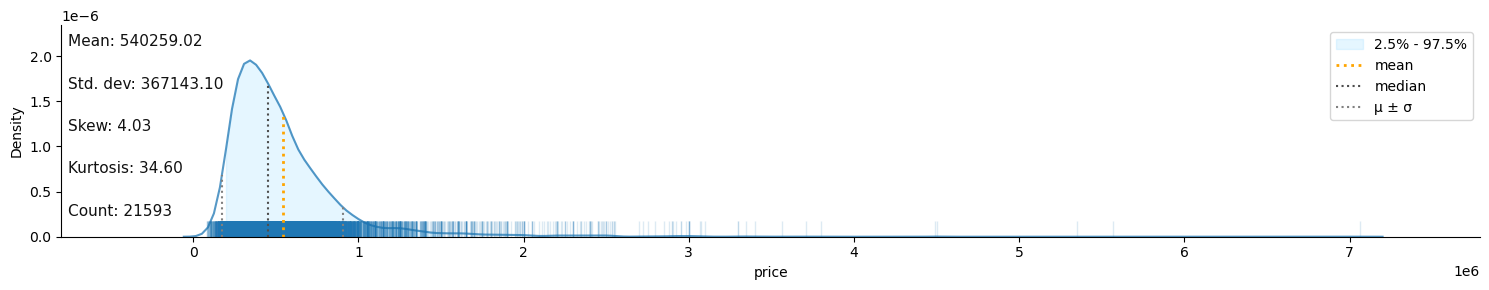

In [61]:
klib.dist_plot(df)

# Q6 
Perform Bivariate analysis
1. Plot pair plots
2. Perform a Chi-square analysis to check whether there is a relationship between
     -view and waterfront
     -condition and grade


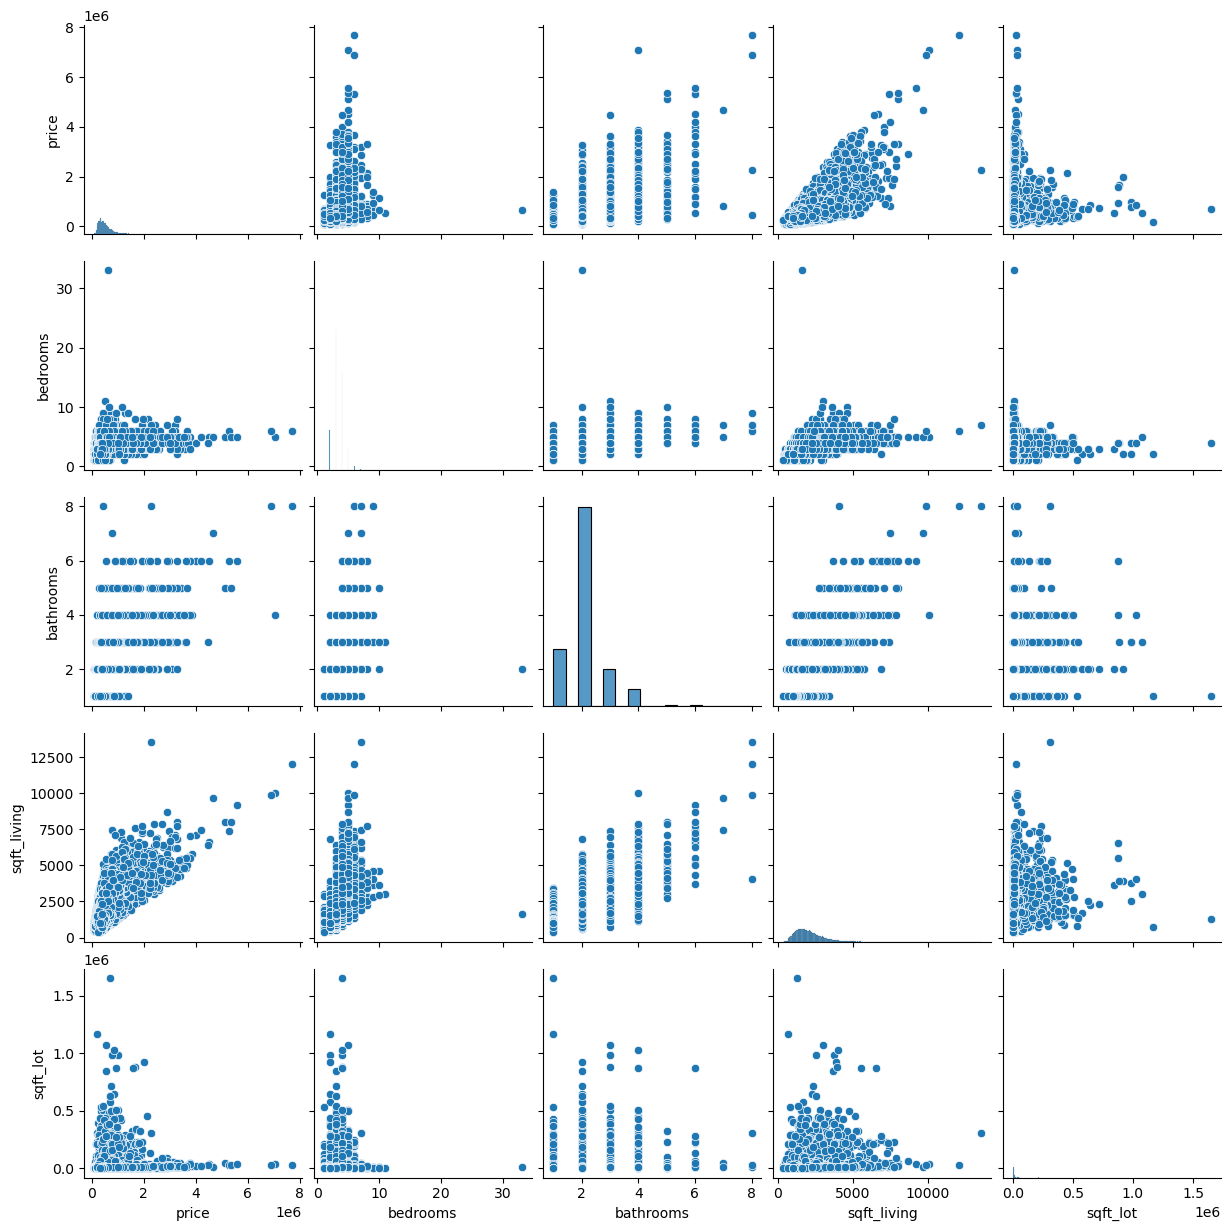

In [36]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()

In [37]:
from scipy.stats import chi2_contingency

# Chi-Square analysis for view and waterfront
view_waterfront = pd.crosstab(df['view'], df['waterfront'])
chi2_view_waterfront, p_view_waterfront, dof_view_waterfront, expected_view_waterfront = chi2_contingency(view_waterfront)
print(f"Chi-Square for view vs. waterfront: {chi2_view_waterfront}")
print(f"P-value for view vs. waterfront: {p_view_waterfront}")

# Chi-Square analysis for condition and grade
condition_grade = pd.crosstab(df['condition'], df['grade'])
chi2_condition_grade, p_condition_grade, dof_condition_grade, expected_condition_grade = chi2_contingency(condition_grade)
print(f"Chi-Square for condition vs. grade: {chi2_condition_grade}")
print(f"P-value for condition vs. grade: {p_condition_grade}")

Chi-Square for view vs. waterfront: 7565.4686526589285
P-value for view vs. waterfront: 0.0
Chi-Square for condition vs. grade: 1458.9378635179705
P-value for condition vs. grade: 3.3048229903019783e-280


# Q6 part 3. Calculate Pearson correlation, and plot their heatmap


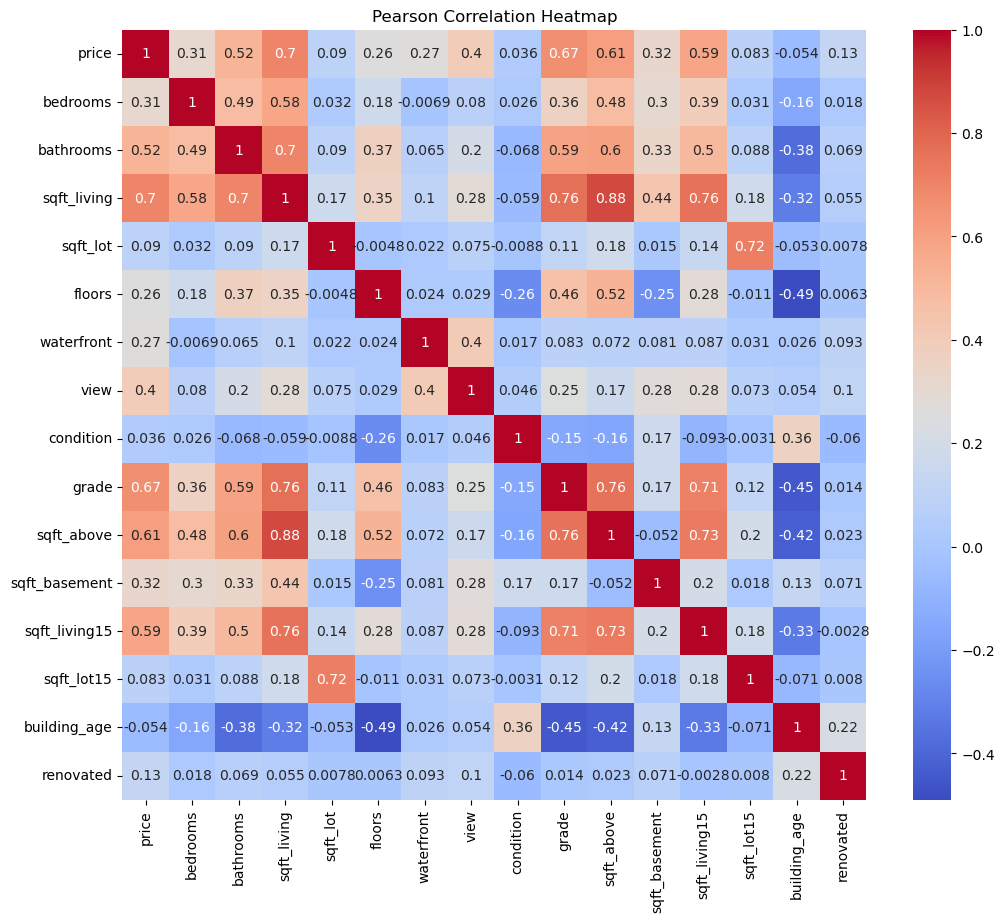

In [38]:
import seaborn as sns

# Calculate Pearson correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

# Q 8 :- One hot encode categorical variables (if any)

In [39]:
# df=pd.get_dummies(df,drop_first=True)

In [40]:
# x = df.drop("price", axis = 1)
# y = df['price']

In [41]:
categorical_columns = ['zipcode']  # Add more if needed
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [42]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


# Split into Train and Test Sets

In [43]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALING

In [44]:
# Scale the Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Q11 Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.

In [45]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
for i, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_names[i]} - MSE: {mse}, R-squared: {r2}")
    

Linear Regression - MSE: 23703078100.781612, R-squared: 0.8052899758049862
Decision Tree - MSE: 39715493396.39546, R-squared: 0.6737552546023937
Random Forest - MSE: 19043013038.195045, R-squared: 0.843570294387603
SVR - MSE: 128298925732.67834, R-squared: -0.05391742065686955


# After running PCA(Principal Component Analysis) on DECISION TREE MODEL

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

# PCA for dimensionality reduction

pca = PCA(n_components=6)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Instantiate the DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# Fit the Decision Tree model on the PCA-transformed training data
decision_tree.fit(X_train_pca, y_train)

# Predict the target values on the PCA-transformed test data
y_pred_decision_tree = decision_tree.predict(X_test_pca)

# Calculate MSE and R-squared for Decision Tree model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print(f"Decision Tree with PCA - MSE: {mse_decision_tree}, R-squared: {r2_decision_tree}")



Decision Tree with PCA - MSE: 87509352285.6281, R-squared: 0.28115040466989916


# 13 . Check whether Linear regression performance is good or not

In [ ]:
# linear regression is performing good

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
# Check Linear Regression Performance


linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred_lr = linear_regression.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}")

# Calculate R-squared, MAE, and RMSE


r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression - R-squared: {r2}")
print(f"Linear Regression - MAE: {mae}")
print(f"Linear Regression - RMSE: {rmse}")

Linear Regression - MSE: 23703078100.781612
Linear Regression - R-squared: 0.8052899758049862
Linear Regression - MAE: 95153.39918550529
Linear Regression - RMSE: 153958.04006540746


# 14 Check for Multi-collinearity (Hint: Use VIF)

In [49]:
# Check for Multi-collinearity (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [50]:
vif_data.head(18)

,feature,VIF
0,bedrooms,22.625211
1,bathrooms,19.765212
2,sqft_living,inf
3,sqft_lot,2.398098
4,floors,19.288015
5,waterfront,1.260273
6,view,1.629407
7,condition,33.083441
8,grade,98.324716
9,sqft_above,inf


# Remove columns with high multi-collinearity (If any)

In [58]:
# Drop features with high VIF

high_vif_features = vif_data[vif_data["VIF"] >= 10]["feature"]
X = X.drop(columns=high_vif_features)

KeyError: "['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15'] not found in axis"

In [52]:
X

,sqft_lot,waterfront,view,sqft_lot15,building_age,renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,5650,0,0,5650,59,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7242,0,0,7639,63,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000,0,0,8062,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5000,0,0,5000,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8080,0,0,7503,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1131,0,0,1509,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,5813,0,0,7200,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1350,0,0,2007,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,2388,0,0,1287,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Re-run all the models and check the performance

In [ ]:
from sklearn.model_selection import train_test_split

In [53]:

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and Evaluate Models (after removing high VIF features)
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']

for i, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{model_names[i]} - MSE: {mse}, R-squared: {r2}, MAE: {mae}, RMSE: {rmse}")

Linear Regression - MSE: 52164148776.63512, R-squared: 0.5714952029763594, MAE: 136338.0903597992, RMSE: 228394.72142901007
Decision Tree - MSE: 62367396754.5681, R-squared: 0.4876801536311207, MAE: 141176.8396233696, RMSE: 249734.65269074714
Random Forest - MSE: 32926346205.275562, R-squared: 0.7295250161593485, MAE: 105885.62934614594, RMSE: 181456.1826041636
SVR - MSE: 128343181365.06073, R-squared: -0.05428096058258314, MAE: 217593.4180744825, RMSE: 358250.1658967665


# Train a polynomial regression model with degree 2, and 3 and compare its performance with other models 


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X and y are your feature matrix and target vector

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and Evaluate Models (after removing high VIF features)
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
]

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']

# Add Polynomial Regression models with degrees 2 and 3
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    models.append(LinearRegression())
    model_names.append(f'Polynomial Regression (degree {degree})')

for i, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{model_names[i]} - MSE: {mse:.2f}, R-squared: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Linear Regression - MSE: 52164148776.64, R-squared: 0.57, MAE: 136338.09, RMSE: 228394.72
Decision Tree - MSE: 63427185535.78, R-squared: 0.48, MAE: 141474.79, RMSE: 251847.54
Random Forest - MSE: 32998043462.31, R-squared: 0.73, MAE: 106373.91, RMSE: 181653.64
SVR - MSE: 128343181365.06, R-squared: -0.05, MAE: 217593.42, RMSE: 358250.17
Polynomial Regression (degree 2) - MSE: 52164148776.64, R-squared: 0.57, MAE: 136338.09, RMSE: 228394.72
Polynomial Regression (degree 3) - MSE: 52164148776.64, R-squared: 0.57, MAE: 136338.09, RMSE: 228394.72
